名企CV班week2作业 朱雷(Ray)

# 作业一：用传统图像方法完成车道线检测

## 导入模块，生成透射变换矩阵和逆矩阵

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

src = np.float32([[200, 720], [1100, 720], [595, 450], [685, 450]])
dst = np.float32([[300, 720], [980, 720], [300, 0], [980, 0]])
m = cv2.getPerspectiveTransform(src, dst)
m_inv = cv2.getPerspectiveTransform(dst, src)

## 加载原始图片，并调整通道顺序

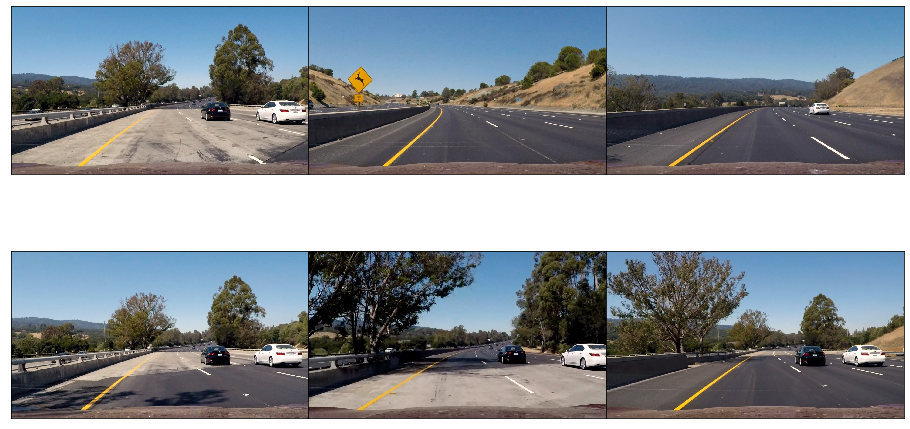

In [2]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 利用cv2.Sobel()计算图像梯度(边缘检测)

定义函数，输入图片，输出边缘检测之后的图片

In [3]:
def abs_sobel_threshold(img, orient='x', thresh_min=2, thresh_max=200):
    
    ###利用x，y方向上sobel，二值化图像######
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        ########参考求x方向的sobel算子，计算y方向上sobel算子#######
        #############填空1 （1行代码）########################
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
        #############填空1 （1行代码）########################
        

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))   # 把矩阵值转换为0-255之间
    binary_output = np.zeros_like(scaled_sobel)
    
    #############二值图像，大于最小阈值并且小于最大阈值的区间置为255， 其余为0，可通过修改最大最小值查看差异######
    ##############填空2（1行代码）########################
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 255  
    #############填空2 （1行代码）########################
   
    return binary_output

检测纵向边缘（x方向的梯度）

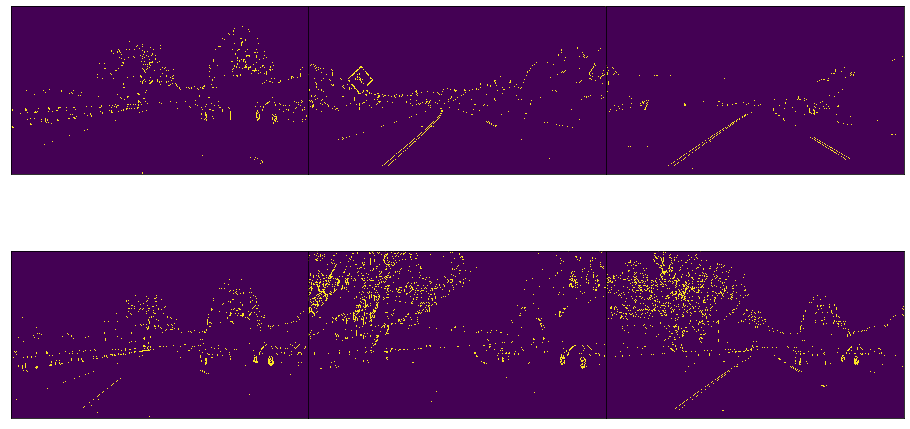

In [4]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(abs_sobel_threshold(img, orient='x', thresh_min=50, thresh_max=255))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

检测横向边缘（y方向的梯度）

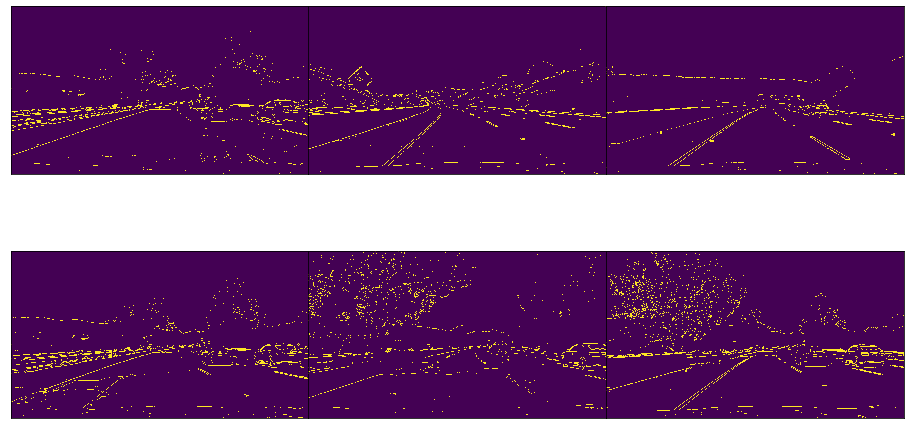

In [5]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(abs_sobel_threshold(img, orient='y', thresh_min=50, thresh_max=255))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 使用全局的变化梯度来进行阈值过滤

定义函数，输入图片，输出全局阈值过滤之后的图片

In [6]:
def mag_threshold(img, sobel_kernel=3, mag_threshold=(20, 1000)):   # mag是magnitude的缩写
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    ########根据x方向的sobel算子和y方向上sobel算子，计算梯度，公式为sqrt（x^2 + y ^2）#######
    #############填空3 （1行代码）########################
    gradmag = np.sqrt(sobelx ** 2 + sobely ** 2)   # 计算梯度幅度

    #############填空3 （1行代码）########################
    scale_factor = np.max(gradmag) / 255
    gradmag = (gradmag / scale_factor).astype(np.uint8)
    binary_out = np.zeros_like(gradmag)
    ########转换为二值图，最大最小值可调，kernel_size也可以调整看看差异#######
    #############填空4 （1行代码）########################
    binary_out[(gradmag >= mag_threshold[0]) & (gradmag <= mag_threshold[1])] = 255

    #############填空4 （1行代码）########################
    
    return binary_out

通过全局阈值过滤来检测车道线

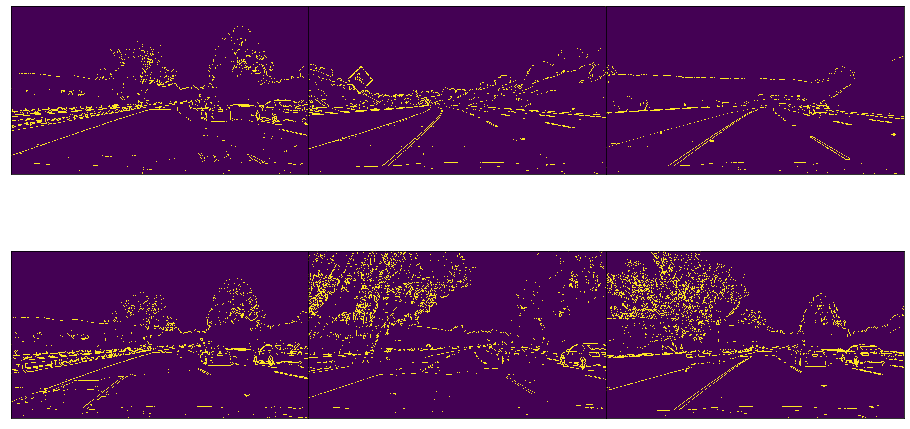

In [7]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(mag_threshold(img, sobel_kernel=3, mag_threshold=(50, 255)))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 通过算子角度来进行阈值过滤

定义函数，输入图片，输出角度阈值过滤之后的图片

In [8]:
def dir_threshold(img, sobel_kernel=5, thresh=(0, np.pi/4)):
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
	sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    ########根据x方向的sobel算子和y方向上sobel算子，计算角度，公式为arctan（y/x），将倾斜角度过大的过滤掉#######
    #############填空5 （1行代码）########################    
	absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #############填空5 （1行代码）########################
    
	binary_output = np.zeros_like(absgraddir)
    
    ########转换为二值图，最大最小值可调，kernel_size也可以调整看看差异#######
    #############填空6 （1行代码）########################
	binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 255
    
    #############填空6 （1行代码）########################
	return binary_output

通过角度阈值过滤来检测车道线

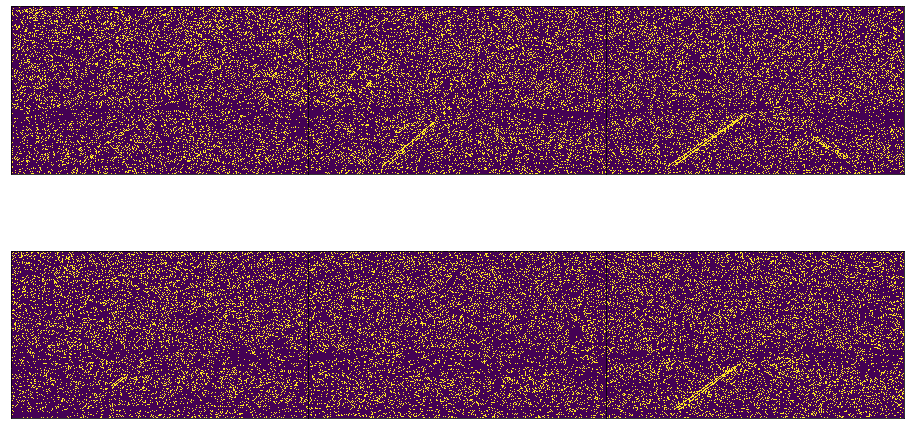

In [9]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(dir_threshold(img, sobel_kernel=5, thresh=(np.pi/4, np.pi/3)))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 使用HLS进行阈值过滤

定义函数，输入图片，输出颜色阈值过滤之后的图片

In [10]:
def hls_thresh(img, thresh=(100, 255)):

	hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    ########分离出s通道s_channel#######
    #############填空7 （1行代码）########################
	s_channel = hls[:, :, 2]
    
    #############填空7 （1行代码）########################
	binary_output = np.zeros_like(s_channel)
    
    ########转换为二值图，最大最小值可调#######
    #############填空8 （1行代码）########################
	binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 255
    
    #############填空8 （1行代码）########################
	return binary_output

通过颜色饱和度阈值过滤来检测车道线

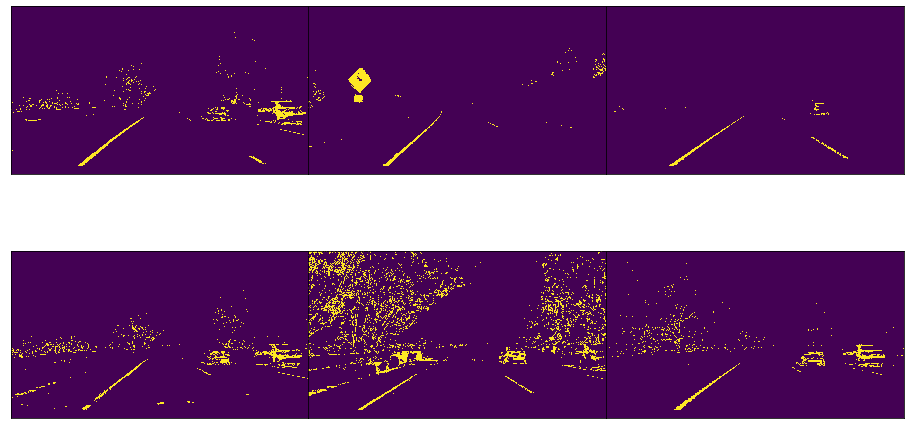

In [11]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow( hls_thresh(img, thresh=(170, 255)))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 综合多种阈值过滤方法

定义函数，输入图片，输出综合阈值过滤之后的图片

In [12]:
def combined_threshold(img):
	abs_bin = abs_sobel_threshold(img, orient='x', thresh_min=50, thresh_max=255)
	mag_bin = mag_threshold(img, sobel_kernel=3, mag_threshold=(50, 255))
	dir_bin = dir_threshold(img, sobel_kernel=15, thresh=(np.pi/4, np.pi/3))
	hls_bin = hls_thresh(img, thresh=(170, 255))

	combined = np.zeros_like(dir_bin)
    #############组合四个阈值结果，判定车道线，##########
    #########例如(abs_bin == 255 | ((mag_bin == 255) & (dir_bin == 255))) | hls_bin == 25）#
    ##########可以尝试不同的组合######################
    #############填空9（1行代码）########################
	combined[(abs_bin == 255 | ((mag_bin == 255) & (dir_bin == 255))) | hls_bin == 255] = 255
    
    #############填空9 （1行代码）########################

	return combined

通过综合多种阈值过滤来检测车道线

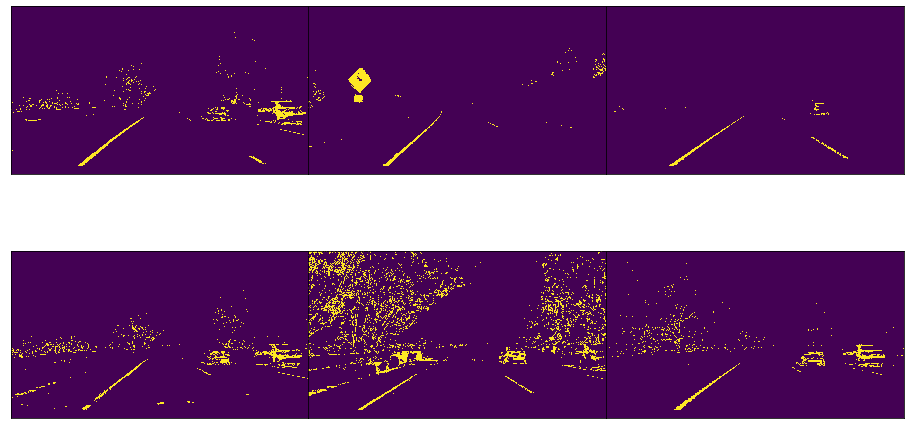

In [13]:
plt.figure(figsize=(16,9))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1)
    plt.imshow(combined_threshold(img))
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

## 使用滑动窗多项式拟合(sliding window polynomial fitting)来获取车道边界

定义函数，输入透视变换后的图片，输出拟合结果

In [14]:
def find_line(binary_warped):
    # "查找拟合直线"
    # 对图像对下半部分查找直方图
    #############填空10（1行代码）截取图像高度的下方1/2处########################
    histogram = np.sum(binary_warped[binary_warped.shape[0] // 2:, :], axis=0)
    
    #############填空10（1行代码）截取图像高度的下方1/2处########################
    out_img = (np.dstack((binary_warped, binary_warped, binary_warped)) * 255).astype('uint8')

    #查找直方图中左右两侧对峰值
    midpoint = np.int(histogram.shape[0] / 2)
    
    #左侧从100到 midpoint的最大值，转换成图像坐标还要加上100哦～############
    #右侧从midpoint到图像宽度减100的最大值，转换成图像坐标还要加上midpoint哦～############
    ####也就是图像左右边缘100像素内不查找车道线##################
    
    #############填空11（2行代码）查找左侧右侧最大值基本点########################
    leftx_base = np.argmax(histogram[100: midpoint]) + 100
    rightx_base = np.argmax(histogram[midpoint: -100]) + midpoint
    
    #############填空11（2行代码）查找左侧右侧最大值基本点########################

    ##########以下是关于滑动窗口查找车道线的代码#####################
    nwindows = 9
    window_height = np.int(binary_warped.shape[0] / nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base
    rightx_current = rightx_base

    margin = 100
    minpix = 10

    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window + 1) * window_height
        win_y_high = binary_warped.shape[0] - window * window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox > win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    ##########以上是关于滑动窗口查找车道线的代码#####################
    
    
    #将左侧，右侧车道线3次拟合，用函数np.polyfit##########
    #############填空12（2行代码）左侧、右侧车道线拟合#######################
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #############填空12（2行代码）左侧、右侧车道线拟合#######################
    return left_fit, right_fit, left_lane_inds, right_lane_inds

测试拟合结果

[ 3.74751238e-04 -4.77376194e-01  4.82432060e+02]
[ 3.75123432e-04 -5.59517072e-01  1.23902469e+03]
[14066 14067 14068 ...  4486  4487  4488]
[15411 15412 15413 ...  1949  1950  1951]
这张图片是binary_warped


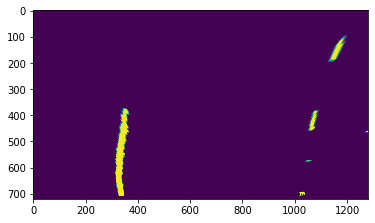

In [15]:
img = cv2.imread('./test_image/test1.jpg')
imgOut = combined_threshold(img)
imgOut_size = (imgOut.shape[1], imgOut.shape[0])
binary_warped = cv2.warpPerspective(imgOut, m, imgOut_size, flags=cv2.INTER_LINEAR)
plt.imshow(binary_warped)
left_f, right_f, left_lane, right_lane = find_line(binary_warped)
print(left_f)
print(right_f)
print(left_lane)
print(right_lane)
print('这张图片是binary_warped')

## 处理原图，展示信息

定义函数，输入左侧、右侧车道线拟合结果以及undist图片，输出车道检测结果

In [16]:
def draw_line(left_fit,right_fit, undist):
    
    ################在图上画出拟合的线########################
    ploty = np.linspace(0, undist.shape[0]-1, undist.shape[0])
    
    #########对y进行拟合，x = a * y ^ 2 + b * y + C
    #############填空13（2行代码）左侧、右侧车道线方程坐标#######################
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]
    #############填空13（2行代码）左侧、右侧车道线方程坐标#######################
    
    ######生成一张黑图，做mask，将车道线区域标注出来##########
    color_warp = np.zeros((720, 1280, 3), dtype='uint8')
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # 在透射变换后的图上画出车道线
    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))
    

    # 将画出的车道线的图，逆变换到原来的图上，将color_warp逆变换为newwarp
    #############填空14（1行代码）#######################
    newwarp = cv2.warpPerspective(color_warp, m_inv, (undist.shape[1], undist.shape[0]))
    #############填空14（1行代码）#######################
    
    
    # 将原来的图和标注好车道线的图叠加，用cv2.addWeighted，可画成半透明，最终图为result
    #############填空15（1行代码）#######################
    result = cv2.addWeighted(undist, 1, newwarp, 0.4, 0)
    #############填空15（1行代码）#######################
    return result

测试一张图片

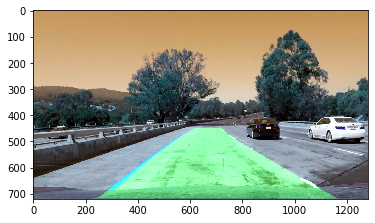

In [17]:
undist = cv2.imread('./test_image/undist1.jpg')
res = draw_line(left_f,right_f, undist)
plt.imshow(res)

## 对所有图片进行测试

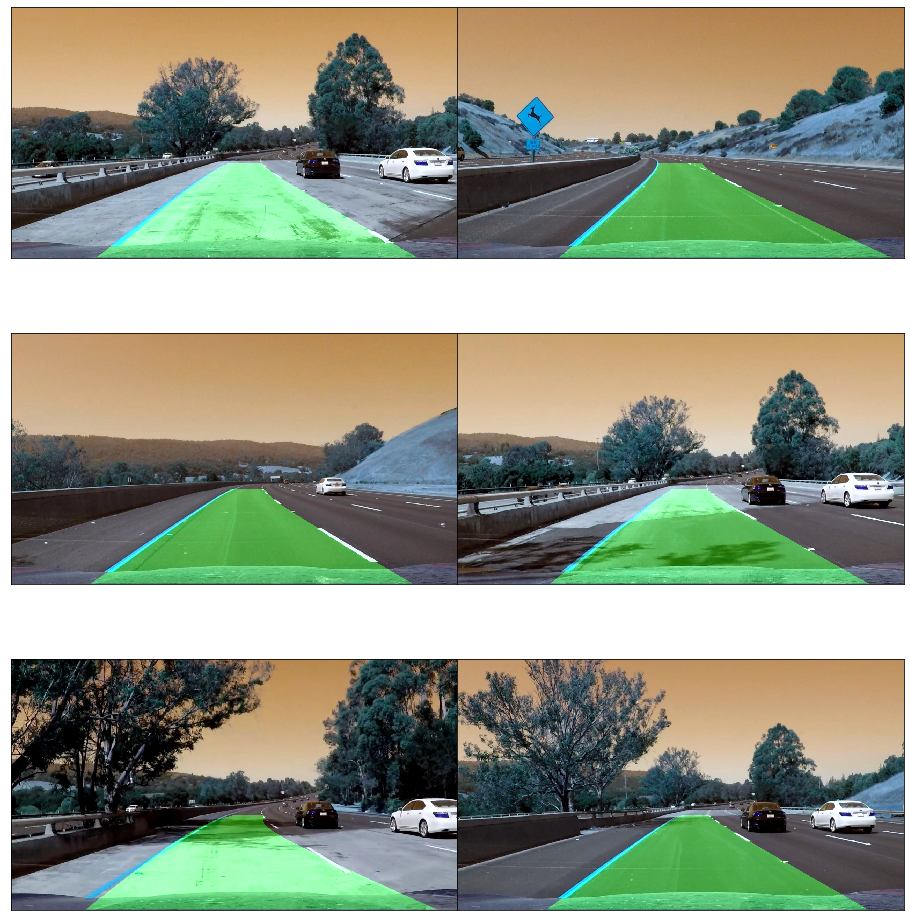

In [18]:
plt.figure(figsize=(16,18))
for i, jpg in enumerate(glob.glob("./test_image/test*.jpg")):
    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgOut = combined_threshold(img)
    imgOut_size = (imgOut.shape[1], imgOut.shape[0])
    binary_warped = cv2.warpPerspective(imgOut, m, imgOut_size, flags=cv2.INTER_LINEAR)
    left_f, right_f, left_lane, right_lane = find_line(binary_warped)
    undist = cv2.imread('./test_image/undist{}.jpg'.format(i+1))
    res = draw_line(left_f,right_f, undist)
    plt.subplot(3,2,i+1)
    plt.imshow(res)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace =0)
plt.show()

# 作业二：学会使用tf或torch进行卷积操作

## TensorFlow中常用的卷积函数

In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

### tf.nn.conv2d

In [20]:
input_data = tf.Variable(np.random.rand(10,9,9,3), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2,2,3,2),dtype=np.float32)
output_data1 = tf.nn.conv2d(input_data, filter_data, strides=[1,1,1,1], padding='SAME')
output_data2 = tf.nn.conv2d(input_data, filter_data, strides=[1,1,1,1], padding='VALID')
print(input_data.shape)
print(output_data1.shape)
print(output_data2.shape)

(10, 9, 9, 3)
(10, 9, 9, 2)
(10, 8, 8, 2)


### tf.nn.depthwise_conv2d

In [21]:
input_data = tf.Variable(np.random.rand(10,9,9,3), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2,2,3,2),dtype=np.float32)
output_data1 = tf.nn.depthwise_conv2d(input_data, filter_data, strides=[1,1,1,1], padding='SAME')
output_data2 = tf.nn.depthwise_conv2d(input_data, filter_data, strides=[1,1,1,1], padding='VALID')
print(input_data.shape)
print(output_data1.shape)
print(output_data2.shape)

(10, 9, 9, 3)
(10, 9, 9, 6)
(10, 8, 8, 6)


### tf.nn.separable_conv2d

In [22]:
input_data = tf.Variable(np.random.rand(10,9,9,3), dtype=np.float32)
depthwise_filter = tf.Variable(np.random.rand(2, 2, 3, 5), dtype=np.float32)
pointwise_filter = tf.Variable(np.random.rand(1, 1, 15, 20), dtype=np.float32)
output_data1 = tf.nn.separable_conv2d(input_data, depthwise_filter=depthwise_filter, pointwise_filter=pointwise_filter,strides=[1,1,1,1],padding='SAME')
output_data1 = tf.nn.separable_conv2d(input_data, depthwise_filter=depthwise_filter, pointwise_filter=pointwise_filter,strides=[1,1,1,1],padding='VALID')
print(input_data.shape)
print(output_data1.shape)
print(output_data2.shape)

(10, 9, 9, 3)
(10, 8, 8, 20)
(10, 8, 8, 6)


### tf.nn.atrous_conv2d

In [23]:
input_data = tf.Variable(np.random.rand(1, 5, 5, 1), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(3, 3, 1, 1), dtype=np.float32)
output_data1 = tf.nn.atrous_conv2d(input_data, filter_data, 2, padding='SAME')
output_data2 = tf.nn.atrous_conv2d(input_data, filter_data, 2, padding='VALID')
print(input_data.shape)
print(output_data1.shape)
print(output_data2.shape)

(1, 5, 5, 1)
(1, 5, 5, 1)
(1, 1, 1, 1)


### tf.nn.conv2d_transpose

In [24]:
input_data = tf.Variable(np.random.rand(1, 3, 3, 1), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2, 2, 3, 1), dtype=np.float32)
output_data = tf.nn.conv2d_transpose(input_data, filter_data, output_shape=[1, 5, 5, 3], strides=[1, 2, 2, 1], padding='SAME')
print(input_data.shape)
print(output_data.shape)

(1, 3, 3, 1)
(1, 5, 5, 3)


### tf.nn.conv1d

In [25]:
input_data = tf.Variable(np.random.rand(1, 5, 1), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(3, 1, 3), dtype=np.float32)
output_data = tf.nn.conv1d(input_data, filter_data, stride=1, padding='SAME')
print(input_data.shape)
print(output_data.shape)

(1, 5, 1)
(1, 5, 3)


### tf.nn.conv3d

In [26]:
input_data = tf.Variable(np.random.rand(1, 2, 5, 5, 1), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2, 3, 3, 1, 3), dtype=np.float32)
output_data = tf.nn.conv3d(input_data, filter_data, strides=[1, 2, 2, 1, 1], padding='SAME')
print(input_data.shape)
print(output_data.shape)

(1, 2, 5, 5, 1)
(1, 1, 3, 5, 3)


### tf.nn.conv3d_transpose

In [27]:
input_data = tf.Variable(np.random.rand(2, 1, 3, 3, 1), dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2, 2, 2, 3, 1), dtype=np.float32)
output_data = tf.nn.conv3d_transpose(input_data, filter_data, output_shape=[2, 1, 5, 5, 3], strides=[1, 2, 2, 2, 1], padding='SAME')
print(input_data.shape)
print(output_data.shape)

(2, 1, 3, 3, 1)
(2, 1, 5, 5, 3)


## pytorch中常用的卷积函数

In [28]:
import torch
import torch.nn as nn

### torch.nn.Conv1d

In [29]:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)
print(input.shape)
print(output.shape)

torch.Size([20, 16, 50])
torch.Size([20, 33, 24])


### torch.nn.Conv2d

In [30]:
m1 = nn.Conv2d(16, 33, 3, stride=2)
m2 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m3 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output1 = m1(input)
output2 = m2(input)
output3 = m3(input)
print(input.shape)
print('-'*50)
print(output1.shape)
print(output2.shape)
print(output3.shape)

torch.Size([20, 16, 50, 100])
--------------------------------------------------
torch.Size([20, 33, 24, 49])
torch.Size([20, 33, 28, 100])
torch.Size([20, 33, 26, 100])


### torch.nn.Conv3d

In [31]:
# With square kernels and equal stride
m1 = nn.Conv3d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m2 = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output1 = m1(input)
output2 = m2(input)
print(input.shape)
print('-'*50)
print(output1.shape)
print(output2.shape)

torch.Size([20, 16, 10, 50, 100])
--------------------------------------------------
torch.Size([20, 33, 4, 24, 49])
torch.Size([20, 33, 8, 50, 99])


### torch.nn.ConvTranspose2d

In [32]:
# With square kernels and equal stride
m1 = nn.ConvTranspose2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m2 = nn.ConvTranspose2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
input = torch.randn(20, 16, 50, 100)
output1 = m1(input)
output2 = m2(input)
print(input.shape)
print('-'*50)
print(output1.shape)
print(output2.shape)

torch.Size([20, 16, 50, 100])
--------------------------------------------------
torch.Size([20, 33, 101, 201])
torch.Size([20, 33, 93, 100])


In [33]:
# exact output size can be also specified as an argument
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
h = downsample(input)
output = upsample(h, output_size=input.size())
print(h.shape, output.shape)

torch.Size([1, 16, 6, 6]) torch.Size([1, 16, 12, 12])


### torch.nn.Unfold

In [34]:
unfold = nn.Unfold(kernel_size=(2, 3))
input = torch.randn(2, 5, 3, 4)
output = unfold(input)
# each patch contains 30 values (2x3=6 vectors, each of 5 channels)
# 4 blocks (2x3 kernels) in total in the 3x4 input
print(output.size())


# Convolution is equivalent with Unfold + Matrix Multiplication + Fold (or view to output shape)
inp = torch.randn(1, 3, 10, 12)
w = torch.randn(2, 3, 4, 5)
inp_unf = torch.nn.functional.unfold(inp, (4, 5))
out_unf = inp_unf.transpose(1, 2).matmul(w.view(w.size(0), -1).t()).transpose(1, 2)
out = torch.nn.functional.fold(out_unf, (7, 8), (1, 1))
# or equivalently (and avoiding a copy),
# out = out_unf.view(1, 2, 7, 8)
res = (torch.nn.functional.conv2d(inp, w) - out).abs().max()
print(res)

torch.Size([2, 30, 4])
tensor(1.9073e-06)


# 作业三：跑通LeNet、VGG、ResNet

## 1、LeNet

### 搭建模型

In [35]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 搭建LeNet模型
le_net = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6,kernel_size=5,activation='sigmoid',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    tf.keras.layers.Conv2D(filters=16,kernel_size=5,activation='sigmoid'),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='sigmoid'),
    tf.keras.layers.Dense(84,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

In [37]:
le_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### 加载数据集

In [38]:
mnist = tf.keras.datasets.mnist   # win10下载到C:\Users\Administrator\.keras\datasets\mnist.npz
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images = tf.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
test_images = tf.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))
print(train_images.shape)
print(test_images.shape)

11493376/11490434 [==============================] - ETA: 15 - ETA: 53 - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 54s - ETA: 48 - ETA: 43 - ETA: 40 - ETA: 38 - ETA: 36 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 29 - ETA: 26 - ETA: 23 - ETA: 21 - ETA: 19 - ETA: 18 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - E

### 训练模型

In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.9,momentum=0.0,nesterov=False)
le_net.compile(optimizer=optimizer,
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
history = le_net.fit(train_images,train_labels,epochs=10,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10


28896/54000 [===============>..............] - ETA: 10:12 - loss: 2.3108 - accuracy: 0.187 - ETA: 1:56 - loss: 2.3390 - accuracy: 0.083 - ETA: 1:19 - loss: 2.3401 - accuracy: 0.07 - ETA: 59s - loss: 2.3313 - accuracy: 0.0854 - ETA: 48s - loss: 2.3250 - accuracy: 0.090 - ETA: 40s - loss: 2.3252 - accuracy: 0.096 - ETA: 35s - loss: 2.3227 - accuracy: 0.095 - ETA: 33s - loss: 2.3217 - accuracy: 0.098 - ETA: 31s - loss: 2.3205 - accuracy: 0.093 - ETA: 30s - loss: 2.3188 - accuracy: 0.095 - ETA: 28s - loss: 2.3170 - accuracy: 0.095 - ETA: 27s - loss: 2.3162 - accuracy: 0.094 - ETA: 26s - loss: 2.3152 - accuracy: 0.093 - ETA: 25s - loss: 2.3144 - accuracy: 0.094 - ETA: 24s - loss: 2.3137 - accuracy: 0.093 - ETA: 24s - loss: 2.3128 - accuracy: 0.097 - ETA: 24s - loss: 2.3123 - accuracy: 0.097 - ETA: 24s - loss: 2.3124 - accuracy: 0.098 - ETA: 24s - loss: 2.3121 - accuracy: 0.097 - ETA: 23s - loss: 2.3121 - accuracy: 0.096 - ETA: 23s - loss: 2.3116 - accuracy: 0.098 - ETA: 23s - loss: 2.3114 -

54000/54000 [==============================] - ETA: 9s - loss: 2.3006 - accuracy: 0.11 - ETA: 8s - loss: 2.3004 - accuracy: 0.11 - ETA: 8s - loss: 2.3001 - accuracy: 0.11 - ETA: 8s - loss: 2.2999 - accuracy: 0.11 - ETA: 8s - loss: 2.2993 - accuracy: 0.11 - ETA: 8s - loss: 2.2988 - accuracy: 0.11 - ETA: 8s - loss: 2.2982 - accuracy: 0.11 - ETA: 8s - loss: 2.2978 - accuracy: 0.11 - ETA: 8s - loss: 2.2974 - accuracy: 0.11 - ETA: 8s - loss: 2.2968 - accuracy: 0.11 - ETA: 8s - loss: 2.2959 - accuracy: 0.11 - ETA: 8s - loss: 2.2947 - accuracy: 0.11 - ETA: 8s - loss: 2.2938 - accuracy: 0.11 - ETA: 8s - loss: 2.2922 - accuracy: 0.11 - ETA: 8s - loss: 2.2906 - accuracy: 0.11 - ETA: 8s - loss: 2.2888 - accuracy: 0.11 - ETA: 7s - loss: 2.2877 - accuracy: 0.11 - ETA: 7s - loss: 2.2857 - accuracy: 0.11 - ETA: 7s - loss: 2.2844 - accuracy: 0.11 - ETA: 7s - loss: 2.2819 - accuracy: 0.12 - ETA: 7s - loss: 2.2789 - accuracy: 0.12 - ETA: 7s - loss: 2.2762 - accuracy: 0.12 - ETA: 7s - loss: 2.2734 - accu

26464/54000 [=============>................] - ETA: 16s - loss: 0.5906 - accuracy: 0.906 - ETA: 20s - loss: 0.2838 - accuracy: 0.906 - ETA: 21s - loss: 0.2456 - accuracy: 0.920 - ETA: 20s - loss: 0.2219 - accuracy: 0.926 - ETA: 20s - loss: 0.2266 - accuracy: 0.916 - ETA: 20s - loss: 0.2502 - accuracy: 0.915 - ETA: 20s - loss: 0.2490 - accuracy: 0.917 - ETA: 20s - loss: 0.2376 - accuracy: 0.922 - ETA: 20s - loss: 0.2561 - accuracy: 0.919 - ETA: 19s - loss: 0.2518 - accuracy: 0.922 - ETA: 19s - loss: 0.2473 - accuracy: 0.923 - ETA: 19s - loss: 0.2471 - accuracy: 0.924 - ETA: 19s - loss: 0.2436 - accuracy: 0.924 - ETA: 19s - loss: 0.2347 - accuracy: 0.927 - ETA: 19s - loss: 0.2327 - accuracy: 0.929 - ETA: 19s - loss: 0.2301 - accuracy: 0.929 - ETA: 19s - loss: 0.2411 - accuracy: 0.928 - ETA: 19s - loss: 0.2386 - accuracy: 0.930 - ETA: 19s - loss: 0.2370 - accuracy: 0.931 - ETA: 19s - loss: 0.2355 - accuracy: 0.931 - ETA: 19s - loss: 0.2431 - accuracy: 0.927 - ETA: 18s - loss: 0.2448 - acc

53472/54000 [============================>.] - ETA: 10s - loss: 0.1840 - accuracy: 0.941 - ETA: 10s - loss: 0.1834 - accuracy: 0.941 - ETA: 10s - loss: 0.1828 - accuracy: 0.941 - ETA: 10s - loss: 0.1825 - accuracy: 0.941 - ETA: 10s - loss: 0.1820 - accuracy: 0.941 - ETA: 10s - loss: 0.1817 - accuracy: 0.941 - ETA: 10s - loss: 0.1812 - accuracy: 0.941 - ETA: 10s - loss: 0.1809 - accuracy: 0.942 - ETA: 10s - loss: 0.1804 - accuracy: 0.942 - ETA: 10s - loss: 0.1799 - accuracy: 0.942 - ETA: 10s - loss: 0.1797 - accuracy: 0.942 - ETA: 9s - loss: 0.1795 - accuracy: 0.942 - ETA: 9s - loss: 0.1790 - accuracy: 0.94 - ETA: 9s - loss: 0.1788 - accuracy: 0.94 - ETA: 9s - loss: 0.1787 - accuracy: 0.94 - ETA: 9s - loss: 0.1785 - accuracy: 0.94 - ETA: 9s - loss: 0.1784 - accuracy: 0.94 - ETA: 9s - loss: 0.1783 - accuracy: 0.94 - ETA: 9s - loss: 0.1781 - accuracy: 0.94 - ETA: 9s - loss: 0.1779 - accuracy: 0.94 - ETA: 9s - loss: 0.1775 - accuracy: 0.94 - ETA: 9s - loss: 0.1775 - accuracy: 0.94 - ETA: 9

54000/54000 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.94 - ETA: 0s - loss: 0.1592 - accuracy: 0.94 - ETA: 0s - loss: 0.1591 - accuracy: 0.94 - ETA: 0s - loss: 0.1591 - accuracy: 0.94 - 22s 417us/sample - loss: 0.1590 - accuracy: 0.9491 - val_loss: 0.1156 - val_accuracy: 0.9660
Epoch 3/10


26304/54000 [=============>................] - ETA: 21s - loss: 0.1416 - accuracy: 0.968 - ETA: 19s - loss: 0.1294 - accuracy: 0.953 - ETA: 18s - loss: 0.0993 - accuracy: 0.963 - ETA: 19s - loss: 0.1187 - accuracy: 0.960 - ETA: 19s - loss: 0.1307 - accuracy: 0.959 - ETA: 19s - loss: 0.1280 - accuracy: 0.960 - ETA: 19s - loss: 0.1297 - accuracy: 0.958 - ETA: 18s - loss: 0.1260 - accuracy: 0.961 - ETA: 19s - loss: 0.1256 - accuracy: 0.963 - ETA: 19s - loss: 0.1232 - accuracy: 0.964 - ETA: 18s - loss: 0.1231 - accuracy: 0.965 - ETA: 18s - loss: 0.1163 - accuracy: 0.968 - ETA: 18s - loss: 0.1145 - accuracy: 0.968 - ETA: 18s - loss: 0.1116 - accuracy: 0.969 - ETA: 18s - loss: 0.1065 - accuracy: 0.971 - ETA: 18s - loss: 0.1012 - accuracy: 0.973 - ETA: 18s - loss: 0.0992 - accuracy: 0.973 - ETA: 17s - loss: 0.1028 - accuracy: 0.971 - ETA: 17s - loss: 0.1003 - accuracy: 0.971 - ETA: 17s - loss: 0.0983 - accuracy: 0.972 - ETA: 17s - loss: 0.0981 - accuracy: 0.971 - ETA: 17s - loss: 0.0991 - acc

53952/54000 [============================>.] - ETA: 10s - loss: 0.1026 - accuracy: 0.968 - ETA: 10s - loss: 0.1024 - accuracy: 0.968 - ETA: 10s - loss: 0.1023 - accuracy: 0.968 - ETA: 10s - loss: 0.1023 - accuracy: 0.968 - ETA: 10s - loss: 0.1022 - accuracy: 0.968 - ETA: 10s - loss: 0.1020 - accuracy: 0.968 - ETA: 10s - loss: 0.1016 - accuracy: 0.968 - ETA: 10s - loss: 0.1018 - accuracy: 0.968 - ETA: 10s - loss: 0.1017 - accuracy: 0.968 - ETA: 10s - loss: 0.1016 - accuracy: 0.968 - ETA: 10s - loss: 0.1019 - accuracy: 0.968 - ETA: 10s - loss: 0.1015 - accuracy: 0.968 - ETA: 10s - loss: 0.1013 - accuracy: 0.968 - ETA: 10s - loss: 0.1010 - accuracy: 0.968 - ETA: 10s - loss: 0.1009 - accuracy: 0.968 - ETA: 10s - loss: 0.1014 - accuracy: 0.968 - ETA: 10s - loss: 0.1015 - accuracy: 0.968 - ETA: 10s - loss: 0.1011 - accuracy: 0.968 - ETA: 10s - loss: 0.1009 - accuracy: 0.968 - ETA: 9s - loss: 0.1010 - accuracy: 0.968 - ETA: 9s - loss: 0.1010 - accuracy: 0.96 - ETA: 9s - loss: 0.1011 - accurac

54000/54000 [==============================] - 22s 408us/sample - loss: 0.1007 - accuracy: 0.9687 - val_loss: 0.0674 - val_accuracy: 0.9792
Epoch 4/10


33408/54000 [=================>............] - ETA: 20s - loss: 0.0816 - accuracy: 0.968 - ETA: 16s - loss: 0.1120 - accuracy: 0.955 - ETA: 17s - loss: 0.1283 - accuracy: 0.955 - ETA: 17s - loss: 0.1057 - accuracy: 0.963 - ETA: 18s - loss: 0.0950 - accuracy: 0.967 - ETA: 17s - loss: 0.0813 - accuracy: 0.972 - ETA: 17s - loss: 0.0714 - accuracy: 0.976 - ETA: 17s - loss: 0.0712 - accuracy: 0.977 - ETA: 17s - loss: 0.0710 - accuracy: 0.978 - ETA: 17s - loss: 0.0675 - accuracy: 0.980 - ETA: 17s - loss: 0.0730 - accuracy: 0.977 - ETA: 17s - loss: 0.0714 - accuracy: 0.978 - ETA: 17s - loss: 0.0733 - accuracy: 0.977 - ETA: 17s - loss: 0.0712 - accuracy: 0.978 - ETA: 16s - loss: 0.0717 - accuracy: 0.978 - ETA: 16s - loss: 0.0706 - accuracy: 0.978 - ETA: 16s - loss: 0.0704 - accuracy: 0.978 - ETA: 16s - loss: 0.0708 - accuracy: 0.978 - ETA: 16s - loss: 0.0697 - accuracy: 0.978 - ETA: 16s - loss: 0.0674 - accuracy: 0.979 - ETA: 15s - loss: 0.0684 - accuracy: 0.978 - ETA: 15s - loss: 0.0708 - acc

54000/54000 [==============================] - ETA: 6s - loss: 0.0921 - accuracy: 0.97 - ETA: 6s - loss: 0.0926 - accuracy: 0.97 - ETA: 6s - loss: 0.0925 - accuracy: 0.97 - ETA: 6s - loss: 0.0928 - accuracy: 0.97 - ETA: 6s - loss: 0.0927 - accuracy: 0.97 - ETA: 6s - loss: 0.0927 - accuracy: 0.97 - ETA: 6s - loss: 0.0928 - accuracy: 0.97 - ETA: 5s - loss: 0.0930 - accuracy: 0.97 - ETA: 5s - loss: 0.0929 - accuracy: 0.97 - ETA: 5s - loss: 0.0931 - accuracy: 0.97 - ETA: 5s - loss: 0.0936 - accuracy: 0.97 - ETA: 5s - loss: 0.0941 - accuracy: 0.97 - ETA: 5s - loss: 0.0941 - accuracy: 0.97 - ETA: 5s - loss: 0.0946 - accuracy: 0.97 - ETA: 5s - loss: 0.0949 - accuracy: 0.97 - ETA: 5s - loss: 0.0948 - accuracy: 0.97 - ETA: 5s - loss: 0.0953 - accuracy: 0.97 - ETA: 5s - loss: 0.0952 - accuracy: 0.97 - ETA: 5s - loss: 0.0949 - accuracy: 0.97 - ETA: 5s - loss: 0.0946 - accuracy: 0.97 - ETA: 5s - loss: 0.0946 - accuracy: 0.97 - ETA: 5s - loss: 0.0945 - accuracy: 0.97 - ETA: 5s - loss: 0.0948 - accu

33472/54000 [=================>............] - ETA: 18s - loss: 0.0372 - accuracy: 1.000 - ETA: 16s - loss: 0.0523 - accuracy: 0.986 - ETA: 16s - loss: 0.0494 - accuracy: 0.984 - ETA: 16s - loss: 0.0574 - accuracy: 0.981 - ETA: 17s - loss: 0.0748 - accuracy: 0.973 - ETA: 17s - loss: 0.0649 - accuracy: 0.976 - ETA: 17s - loss: 0.0776 - accuracy: 0.973 - ETA: 17s - loss: 0.0793 - accuracy: 0.971 - ETA: 17s - loss: 0.0802 - accuracy: 0.971 - ETA: 17s - loss: 0.0813 - accuracy: 0.972 - ETA: 17s - loss: 0.0748 - accuracy: 0.974 - ETA: 17s - loss: 0.0761 - accuracy: 0.974 - ETA: 17s - loss: 0.0782 - accuracy: 0.974 - ETA: 17s - loss: 0.0787 - accuracy: 0.973 - ETA: 17s - loss: 0.0790 - accuracy: 0.973 - ETA: 17s - loss: 0.0831 - accuracy: 0.972 - ETA: 16s - loss: 0.0814 - accuracy: 0.972 - ETA: 16s - loss: 0.0821 - accuracy: 0.972 - ETA: 16s - loss: 0.0844 - accuracy: 0.972 - ETA: 16s - loss: 0.0811 - accuracy: 0.973 - ETA: 16s - loss: 0.0784 - accuracy: 0.974 - ETA: 16s - loss: 0.0760 - acc

54000/54000 [==============================] - ETA: 6s - loss: 0.0750 - accuracy: 0.97 - ETA: 6s - loss: 0.0752 - accuracy: 0.97 - ETA: 6s - loss: 0.0753 - accuracy: 0.97 - ETA: 6s - loss: 0.0752 - accuracy: 0.97 - ETA: 6s - loss: 0.0753 - accuracy: 0.97 - ETA: 6s - loss: 0.0753 - accuracy: 0.97 - ETA: 5s - loss: 0.0756 - accuracy: 0.97 - ETA: 5s - loss: 0.0757 - accuracy: 0.97 - ETA: 5s - loss: 0.0755 - accuracy: 0.97 - ETA: 5s - loss: 0.0752 - accuracy: 0.97 - ETA: 5s - loss: 0.0750 - accuracy: 0.97 - ETA: 5s - loss: 0.0751 - accuracy: 0.97 - ETA: 5s - loss: 0.0750 - accuracy: 0.97 - ETA: 5s - loss: 0.0749 - accuracy: 0.97 - ETA: 5s - loss: 0.0747 - accuracy: 0.97 - ETA: 5s - loss: 0.0746 - accuracy: 0.97 - ETA: 5s - loss: 0.0745 - accuracy: 0.97 - ETA: 5s - loss: 0.0750 - accuracy: 0.97 - ETA: 5s - loss: 0.0752 - accuracy: 0.97 - ETA: 5s - loss: 0.0752 - accuracy: 0.97 - ETA: 5s - loss: 0.0751 - accuracy: 0.97 - ETA: 5s - loss: 0.0753 - accuracy: 0.97 - ETA: 5s - loss: 0.0751 - accu

33472/54000 [=================>............] - ETA: 20s - loss: 0.0225 - accuracy: 1.000 - ETA: 19s - loss: 0.0893 - accuracy: 0.963 - ETA: 17s - loss: 0.0885 - accuracy: 0.968 - ETA: 16s - loss: 0.0900 - accuracy: 0.967 - ETA: 16s - loss: 0.0858 - accuracy: 0.970 - ETA: 16s - loss: 0.1048 - accuracy: 0.964 - ETA: 16s - loss: 0.1012 - accuracy: 0.966 - ETA: 16s - loss: 0.0931 - accuracy: 0.968 - ETA: 16s - loss: 0.0849 - accuracy: 0.971 - ETA: 15s - loss: 0.0889 - accuracy: 0.971 - ETA: 15s - loss: 0.0857 - accuracy: 0.972 - ETA: 15s - loss: 0.0861 - accuracy: 0.971 - ETA: 15s - loss: 0.0834 - accuracy: 0.972 - ETA: 15s - loss: 0.0796 - accuracy: 0.974 - ETA: 15s - loss: 0.0776 - accuracy: 0.974 - ETA: 15s - loss: 0.0773 - accuracy: 0.975 - ETA: 15s - loss: 0.0778 - accuracy: 0.975 - ETA: 15s - loss: 0.0750 - accuracy: 0.976 - ETA: 15s - loss: 0.0720 - accuracy: 0.977 - ETA: 15s - loss: 0.0701 - accuracy: 0.978 - ETA: 15s - loss: 0.0682 - accuracy: 0.979 - ETA: 15s - loss: 0.0705 - acc

54000/54000 [==============================] - ETA: 6s - loss: 0.0649 - accuracy: 0.97 - ETA: 6s - loss: 0.0649 - accuracy: 0.97 - ETA: 6s - loss: 0.0651 - accuracy: 0.97 - ETA: 6s - loss: 0.0649 - accuracy: 0.97 - ETA: 6s - loss: 0.0652 - accuracy: 0.97 - ETA: 6s - loss: 0.0651 - accuracy: 0.97 - ETA: 6s - loss: 0.0651 - accuracy: 0.97 - ETA: 6s - loss: 0.0652 - accuracy: 0.97 - ETA: 6s - loss: 0.0653 - accuracy: 0.97 - ETA: 6s - loss: 0.0654 - accuracy: 0.97 - ETA: 5s - loss: 0.0657 - accuracy: 0.97 - ETA: 5s - loss: 0.0662 - accuracy: 0.97 - ETA: 5s - loss: 0.0665 - accuracy: 0.97 - ETA: 5s - loss: 0.0667 - accuracy: 0.97 - ETA: 5s - loss: 0.0666 - accuracy: 0.97 - ETA: 5s - loss: 0.0666 - accuracy: 0.97 - ETA: 5s - loss: 0.0665 - accuracy: 0.97 - ETA: 5s - loss: 0.0665 - accuracy: 0.97 - ETA: 5s - loss: 0.0664 - accuracy: 0.97 - ETA: 5s - loss: 0.0666 - accuracy: 0.97 - ETA: 5s - loss: 0.0666 - accuracy: 0.97 - ETA: 5s - loss: 0.0668 - accuracy: 0.97 - ETA: 5s - loss: 0.0667 - accu

26336/54000 [=============>................] - ETA: 18s - loss: 0.0565 - accuracy: 0.968 - ETA: 22s - loss: 0.0340 - accuracy: 0.987 - ETA: 20s - loss: 0.0398 - accuracy: 0.990 - ETA: 20s - loss: 0.0482 - accuracy: 0.987 - ETA: 20s - loss: 0.0438 - accuracy: 0.986 - ETA: 21s - loss: 0.0482 - accuracy: 0.983 - ETA: 21s - loss: 0.0452 - accuracy: 0.985 - ETA: 21s - loss: 0.0427 - accuracy: 0.986 - ETA: 20s - loss: 0.0421 - accuracy: 0.985 - ETA: 20s - loss: 0.0430 - accuracy: 0.985 - ETA: 20s - loss: 0.0406 - accuracy: 0.987 - ETA: 20s - loss: 0.0394 - accuracy: 0.986 - ETA: 21s - loss: 0.0383 - accuracy: 0.987 - ETA: 21s - loss: 0.0370 - accuracy: 0.988 - ETA: 21s - loss: 0.0376 - accuracy: 0.986 - ETA: 21s - loss: 0.0377 - accuracy: 0.987 - ETA: 21s - loss: 0.0356 - accuracy: 0.988 - ETA: 20s - loss: 0.0369 - accuracy: 0.988 - ETA: 20s - loss: 0.0376 - accuracy: 0.987 - ETA: 20s - loss: 0.0373 - accuracy: 0.987 - ETA: 20s - loss: 0.0392 - accuracy: 0.986 - ETA: 20s - loss: 0.0414 - acc

54000/54000 [==============================] - ETA: 10s - loss: 0.0525 - accuracy: 0.983 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0530 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0530 - accuracy: 0.982 - ETA: 10s - loss: 0.0529 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0527 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0529 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0528 - accuracy: 0.982 - ETA: 10s - loss: 0.0532 - accuracy: 0.982 - ETA: 10s - loss: 0.0535 - accuracy: 0.982 - ETA: 9s - loss: 0.0533 - accuracy: 0.982 - ETA: 9s - loss: 0.0533 - accuracy: 0.98 - ETA: 9s - loss: 0.0531 - accuracy: 0.98 - ETA: 9s - loss: 0.0530 - accuracy: 0.98 - ETA: 9s - loss: 0.0531 - accuracy: 0.98 - ETA: 9s - loss: 0.0529 - accuracy: 0.98 - ETA: 9s - loss: 0.0532 - accuracy: 0.98 

28832/54000 [===============>..............] - ETA: 26s - loss: 0.0550 - accuracy: 0.968 - ETA: 27s - loss: 0.0670 - accuracy: 0.981 - ETA: 26s - loss: 0.0453 - accuracy: 0.986 - ETA: 25s - loss: 0.0487 - accuracy: 0.985 - ETA: 25s - loss: 0.0527 - accuracy: 0.983 - ETA: 25s - loss: 0.0480 - accuracy: 0.983 - ETA: 25s - loss: 0.0431 - accuracy: 0.985 - ETA: 25s - loss: 0.0420 - accuracy: 0.984 - ETA: 24s - loss: 0.0448 - accuracy: 0.984 - ETA: 24s - loss: 0.0512 - accuracy: 0.982 - ETA: 24s - loss: 0.0515 - accuracy: 0.982 - ETA: 23s - loss: 0.0505 - accuracy: 0.982 - ETA: 23s - loss: 0.0477 - accuracy: 0.983 - ETA: 23s - loss: 0.0486 - accuracy: 0.983 - ETA: 23s - loss: 0.0486 - accuracy: 0.984 - ETA: 22s - loss: 0.0527 - accuracy: 0.983 - ETA: 22s - loss: 0.0499 - accuracy: 0.984 - ETA: 21s - loss: 0.0508 - accuracy: 0.984 - ETA: 21s - loss: 0.0518 - accuracy: 0.983 - ETA: 20s - loss: 0.0514 - accuracy: 0.983 - ETA: 20s - loss: 0.0503 - accuracy: 0.984 - ETA: 20s - loss: 0.0531 - acc

54000/54000 [==============================] - ETA: 8s - loss: 0.0555 - accuracy: 0.98 - ETA: 8s - loss: 0.0555 - accuracy: 0.98 - ETA: 8s - loss: 0.0556 - accuracy: 0.98 - ETA: 8s - loss: 0.0557 - accuracy: 0.98 - ETA: 8s - loss: 0.0556 - accuracy: 0.98 - ETA: 8s - loss: 0.0556 - accuracy: 0.98 - ETA: 8s - loss: 0.0553 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 8s - loss: 0.0549 - accuracy: 0.98 - ETA: 8s - loss: 0.0549 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 8s - loss: 0.0551 - accuracy: 0.98 - ETA: 7s - loss: 0.0550 - accuracy: 0.98 - ETA: 7s - loss: 0.0551 - accuracy: 0.98 - ETA: 7s - loss: 0.0550 - accuracy: 0.98 - ETA: 7s - loss: 0.0549 - accuracy: 0.98 - ETA: 7s - loss: 0.0547 - accuracy: 0.98 - ETA: 7s - loss: 0.0546 - accuracy: 0.98 - ETA: 7s - loss: 0.0546 - accuracy: 0.98 - ETA: 7s - loss: 0.0547 - accu

28064/54000 [==============>...............] - ETA: 20s - loss: 0.0597 - accuracy: 0.968 - ETA: 21s - loss: 0.0443 - accuracy: 0.981 - ETA: 19s - loss: 0.0437 - accuracy: 0.981 - ETA: 18s - loss: 0.0374 - accuracy: 0.985 - ETA: 19s - loss: 0.0347 - accuracy: 0.986 - ETA: 19s - loss: 0.0406 - accuracy: 0.985 - ETA: 19s - loss: 0.0397 - accuracy: 0.985 - ETA: 19s - loss: 0.0469 - accuracy: 0.983 - ETA: 19s - loss: 0.0472 - accuracy: 0.982 - ETA: 19s - loss: 0.0485 - accuracy: 0.983 - ETA: 19s - loss: 0.0466 - accuracy: 0.983 - ETA: 19s - loss: 0.0469 - accuracy: 0.982 - ETA: 19s - loss: 0.0467 - accuracy: 0.983 - ETA: 19s - loss: 0.0490 - accuracy: 0.982 - ETA: 18s - loss: 0.0499 - accuracy: 0.982 - ETA: 18s - loss: 0.0521 - accuracy: 0.980 - ETA: 18s - loss: 0.0530 - accuracy: 0.980 - ETA: 18s - loss: 0.0558 - accuracy: 0.980 - ETA: 18s - loss: 0.0560 - accuracy: 0.980 - ETA: 18s - loss: 0.0585 - accuracy: 0.980 - ETA: 18s - loss: 0.0565 - accuracy: 0.980 - ETA: 17s - loss: 0.0565 - acc

54000/54000 [==============================] - ETA: 9s - loss: 0.0541 - accuracy: 0.98 - ETA: 9s - loss: 0.0545 - accuracy: 0.98 - ETA: 9s - loss: 0.0546 - accuracy: 0.98 - ETA: 9s - loss: 0.0545 - accuracy: 0.98 - ETA: 9s - loss: 0.0546 - accuracy: 0.98 - ETA: 9s - loss: 0.0547 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0545 - accuracy: 0.98 - ETA: 8s - loss: 0.0550 - accuracy: 0.98 - ETA: 8s - loss: 0.0550 - accuracy: 0.98 - ETA: 8s - loss: 0.0549 - accuracy: 0.98 - ETA: 8s - loss: 0.0548 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0545 - accuracy: 0.98 - ETA: 8s - loss: 0.0544 - accuracy: 0.98 - ETA: 8s - loss: 0.0544 - accuracy: 0.98 - ETA: 8s - loss: 0.0543 - accuracy: 0.98 - ETA: 8s - loss: 0.0547 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accuracy: 0.98 - ETA: 8s - loss: 0.0546 - accu

28480/54000 [==============>...............] - ETA: 18s - loss: 0.0717 - accuracy: 0.968 - ETA: 21s - loss: 0.0388 - accuracy: 0.987 - ETA: 20s - loss: 0.0511 - accuracy: 0.981 - ETA: 20s - loss: 0.0391 - accuracy: 0.985 - ETA: 19s - loss: 0.0391 - accuracy: 0.984 - ETA: 20s - loss: 0.0398 - accuracy: 0.985 - ETA: 20s - loss: 0.0375 - accuracy: 0.985 - ETA: 20s - loss: 0.0365 - accuracy: 0.985 - ETA: 20s - loss: 0.0362 - accuracy: 0.986 - ETA: 20s - loss: 0.0340 - accuracy: 0.987 - ETA: 20s - loss: 0.0349 - accuracy: 0.987 - ETA: 20s - loss: 0.0335 - accuracy: 0.988 - ETA: 20s - loss: 0.0321 - accuracy: 0.988 - ETA: 20s - loss: 0.0320 - accuracy: 0.989 - ETA: 20s - loss: 0.0310 - accuracy: 0.989 - ETA: 20s - loss: 0.0295 - accuracy: 0.990 - ETA: 20s - loss: 0.0283 - accuracy: 0.990 - ETA: 20s - loss: 0.0273 - accuracy: 0.991 - ETA: 20s - loss: 0.0275 - accuracy: 0.990 - ETA: 20s - loss: 0.0269 - accuracy: 0.991 - ETA: 20s - loss: 0.0271 - accuracy: 0.991 - ETA: 19s - loss: 0.0262 - acc

54000/54000 [==============================] - ETA: 9s - loss: 0.0423 - accuracy: 0.98 - ETA: 8s - loss: 0.0422 - accuracy: 0.98 - ETA: 8s - loss: 0.0422 - accuracy: 0.98 - ETA: 8s - loss: 0.0422 - accuracy: 0.98 - ETA: 8s - loss: 0.0422 - accuracy: 0.98 - ETA: 8s - loss: 0.0423 - accuracy: 0.98 - ETA: 8s - loss: 0.0423 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 8s - loss: 0.0424 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 8s - loss: 0.0423 - accuracy: 0.98 - ETA: 8s - loss: 0.0427 - accuracy: 0.98 - ETA: 8s - loss: 0.0427 - accuracy: 0.98 - ETA: 8s - loss: 0.0428 - accuracy: 0.98 - ETA: 8s - loss: 0.0426 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 8s - loss: 0.0427 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 8s - loss: 0.0425 - accuracy: 0.98 - ETA: 7s - loss: 0.0425 - accuracy: 0.98 - ETA: 7s - loss: 0.0426 - accuracy: 0.98 - ETA: 7s - loss: 0.0429 - accu

### 查看训练结果

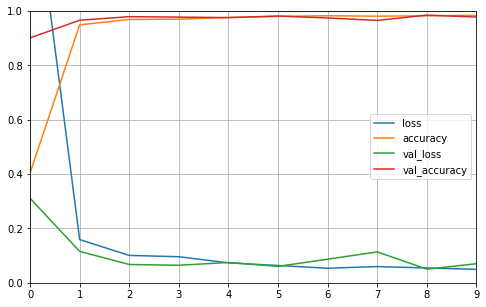

In [40]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

### 进行预测

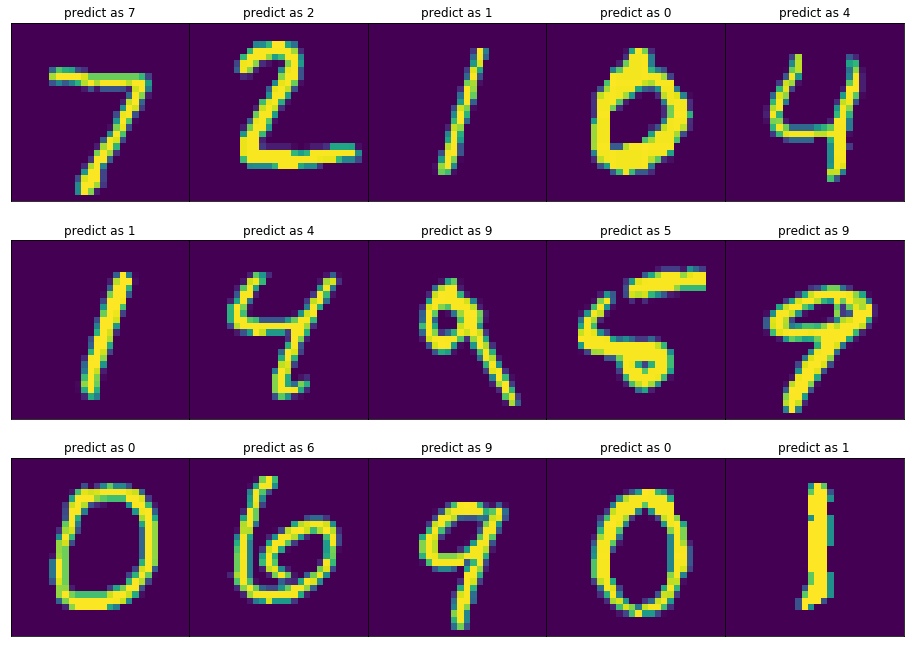

In [41]:
predicts = np.argmax(le_net.predict(test_images), axis=1)
plt.figure(figsize=(16,12))
for i in range(15):
    img = tf.reshape(test_images[i], [28, 28])
    ax = plt.subplot(3,5,i+1)
    ax.set_title('predict as {}'.format(predicts[i]))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace =0, hspace = 0)
plt.show()

## 2、VGG

### 搭建模型

In [42]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

In [43]:
tf.config.list_physical_devices('GPU')

[]

In [44]:
from  tensorflow.keras import regularizers
weight_decay = 0.0004

def VGG16():
    model = models.Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))

    model.add(Flatten())  # 2*2*512
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [45]:
model=VGG16()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)        

###  加载数据集

In [46]:
import pickle

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb')as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32)
        Y = np.array(Y)
        return X, Y


def load_CIFAR(Foldername):
    train_data = np.zeros([50000, 32, 32, 3], dtype=np.float32)
    train_label = np.zeros([50000, 10], dtype=np.float32)
    test_data = np.zeros([10000, 32, 32, 3], dtype=np.float32)
    test_label = np.zeros([10000, 10], dtype=np.float32)

    for sample in range(5):
        X, Y = load_CIFAR_batch(Foldername + "/data_batch_" + str(sample + 1))

        for i in range(3):
            train_data[10000 * sample:10000 * (sample + 1), :, :, i] = X[:, i, :, :]
        for i in range(10000):
            train_label[i + 10000 * sample][Y[i]] = 1

    X, Y = load_CIFAR_batch(Foldername + "/test_batch")
    for i in range(3):
        test_data[:, :, :, i] = X[:, i, :, :]
    for i in range(10000):
        test_label[i][Y[i]] = 1

    return train_data, train_label, test_data, test_label

In [47]:
(train_images, train_labels, test_images, test_labels) = load_CIFAR('/root/ray/cifar10/cifar-10-batches-py')
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

FileNotFoundError: [Errno 2] No such file or directory: '/root/ray/cifar10/cifar-10-batches-py/data_batch_1'

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
train_labels.shape

(50000, 10, 10)

### 训练模型

In [10]:
import math
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate
change_lr = keras.callbacks.LearningRateScheduler(step_decay)
sgd = keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(train_images, train_labels,
          batch_size=32,
          epochs=10,
          callbacks=[change_lr],
          validation_data=(test_images, test_labels))

训练比较费时，所以没有运行

### 查看训练结果

### 进行预测

## 3、ResNet

### 搭建模型

In [48]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
# for 18 or 34 layers
class Basic_Block(keras.Model):
    ''' basic block constructing the layers for resNet18 and resNet34
    '''
    def __init__(self, filters, block_name,
                downsample=False, stride=1):
        self.expasion = 1
        super(Basic_Block, self).__init__()
        conv_name = 'res' + block_name + '_branch'
        bn_name = 'bn' + block_name + '_branch'

        self.downsample = downsample

        self.conv2a = keras.layers.Conv2D(filters=filters,
                                          kernel_size=3,
                                          padding='same',
                                          strides=stride,
                                          kernel_initializer='he_normal',
                                          )
        self.bn2a = keras.layers.BatchNormalization(axis=-1)

        self.conv2b = keras.layers.Conv2D(filters=filters,
                                          kernel_size=3,
                                          padding='same',
                                          kernel_initializer='he_normal'
                                          )
        self.bn2b = keras.layers.BatchNormalization(axis=-1)

        self.relu = keras.layers.ReLU()

        if self.downsample:
            self.conv_shortcut = keras.layers.Conv2D(filters=filters,
                                                     kernel_size=1,
                                                     strides=stride,
                                                     kernel_initializer='he_normal',
                                                     )
            self.bn_shortcut = keras.layers.BatchNormalization(axis=-1)

    def call(self, inputs, **kwargs):
        x = self.conv2a(inputs)
        x = self.bn2a(x)
        x = self.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x)
        x = self.relu(x)

        if self.downsample:
            shortcut = self.conv_shortcut(inputs)
            shortcut = self.bn_shortcut(shortcut)
        else:
            shortcut = inputs

        x = keras.layers.add([x, shortcut])
        x = self.relu(x)

        return x

In [50]:
# for 50, 101 or 152 layers
class Block(keras.Model):
    ''' basic block constructing the layers for resNet50, resNet101 and resNet152
    '''
    def __init__(self, filters, block_name,
                 downsample=False, stride=1, **kwargs):
        self.expasion = 4
        super(Block, self).__init__(**kwargs)

        conv_name = 'res' + block_name + '_branch'
        bn_name = 'bn' + block_name + '_branch'
        self.downsample = downsample

        self.conv2a = keras.layers.Conv2D(filters=filters,
                                          kernel_size=1,
                                          strides=stride,
                                          kernel_initializer='he_normal',
                                          name=conv_name + '2a')
        self.bn2a = keras.layers.BatchNormalization(axis=3, name=bn_name + '2a')

        self.conv2b = keras.layers.Conv2D(filters=filters,
                                          kernel_size=3,
                                          padding='same',
                                          kernel_initializer='he_normal',
                                          name=conv_name + '2b')
        self.bn2b = keras.layers.BatchNormalization(axis=3, name=bn_name + '2b')

        self.conv2c = keras.layers.Conv2D(filters=4 * filters,
                                          kernel_size=1,
                                          kernel_initializer='he_normal',
                                          name=conv_name + '2c')
        self.bn2c = keras.layers.BatchNormalization(axis=3, name=bn_name + '2c')

        if self.downsample:
            self.conv_shortcut = keras.layers.Conv2D(filters=4 * filters,
                                                     kernel_size=1,
                                                     strides=stride,
                                                     kernel_initializer='he_normal',
                                                     name=conv_name + '1')
            self.bn_shortcut = keras.layers.BatchNormalization(axis=3, name=bn_name + '1')

    def call(self, inputs, **kwargs):
        x = self.conv2a(inputs)
        x = self.bn2a(x)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x)

        if self.downsample:
            shortcut = self.conv_shortcut(inputs)
            shortcut = self.bn_shortcut(shortcut)
        else:
            shortcut = inputs

        x = keras.layers.add([x, shortcut])
        x = tf.nn.relu(x)

        return x

In [51]:
class ResNet(keras.Model):
    ''' class for resNet18, resNet34, resNet50, resNet101 and resNet152
    '''
    def __init__(self, block, layers, num_classes=1000, **kwargs):
        ''' init

            :param block: block object. block = Block for resNet50, resNet101, resNet152;
                                        block = Basic_Block for resNet18, resNet34;
            :param layers: list. layer structure according to resNet.
            :param num_classes: int. num of classes.
            :param **kwargs: **kwargs
        '''
        super(ResNet, self).__init__(**kwargs)

        self.padding = keras.layers.ZeroPadding2D((3, 3))
        self.conv1 = keras.layers.Conv2D(filters=64,
                                         kernel_size=7,
                                         strides=2,
                                         kernel_initializer='glorot_uniform',
                                         name='conv1')
        self.bn_conv1 = keras.layers.BatchNormalization(axis=3, name='bn_conv1')
        self.max_pool = keras.layers.MaxPooling2D((3, 3),
                                                  strides=2,
                                                  padding='same')
        self.avgpool = keras.layers.GlobalAveragePooling2D(name='avg_pool')
        self.fc = keras.layers.Dense(num_classes, activation='softmax', name='result')

        # layer2
        self.res2 = self.mid_layer(block, 64, layers[0], stride=1, layer_number=2)

        # layer3
        self.res3 = self.mid_layer(block, 128, layers[1], stride=2, layer_number=3)

        # layer4
        self.res4 = self.mid_layer(block, 256, layers[2], stride=2, layer_number=4)

        # layer5
        self.res5 = self.mid_layer(block, 512, layers[3], stride=2, layer_number=5)

    def mid_layer(self, block, filter, block_layers, stride=1, layer_number=1):
        layer = keras.Sequential()
        if stride != 1 or filter * 4 != 64:
            layer.add(block(filters=filter,
                            downsample=True, stride=stride,
                            block_name='{}a'.format(layer_number)))

        for i in range(1, block_layers):
            p = chr(i + ord('a'))
            layer.add(block(filters=filter,
                            block_name='{}'.format(layer_number) + p))

        return layer

    def call(self, inputs, **kwargs):
        x = self.padding(inputs)
        x = self.conv1(x)
        x = self.bn_conv1(x)
        x = tf.nn.relu(x)
        x = self.max_pool(x)
        # layer2
        x = self.res2(x)
        # layer3
        x = self.res3(x)
        # layer4
        x = self.res4(x)
        # layer5
        x = self.res5(x)

        x = self.avgpool(x)
        x = self.fc(x)
        return x

In [52]:
def resnet18():
    return ResNet(Basic_Block, [2, 2, 2, 2], num_classes=1000)


def resnet38():
    return ResNet(Basic_Block, [3, 4, 6, 3], num_classes=1000)


def resnet50():
    return ResNet(Block, [3, 4, 6, 3], num_classes=1000)


def resnet101():
    return ResNet(Block, [3, 4, 23, 3], num_classes=1000)


def resnet152():
    return ResNet(Block, [3, 8, 36, 3], num_classes=1000)

### 加载数据集

In [53]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 给数据增加一个维度，使数据和网络结构匹配
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print("after reshape:x_train.shape", x_train.shape)
print("after reshape:x_test.shape", x_test.shape)

x_train.shape (60000, 28, 28)
x_test.shape (10000, 28, 28)
after reshape:x_train.shape (60000, 28, 28, 1)
after reshape:x_test.shape (10000, 28, 28, 1)


### 训练模型

In [ ]:
model = resnet50()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test))
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


32256/60000 [===============>..............] - ETA: 1:11:36 - loss: 8.4967 - sparse_categorical_accuracy: 0.0000e+ - ETA: 1:06:20 - loss: 6.3584 - sparse_categorical_accuracy: 0.0762   - ETA: 1:06:27 - loss: 5.1468 - sparse_categorical_accuracy: 0.13 - ETA: 1:06:17 - loss: 4.5760 - sparse_categorical_accuracy: 0.16 - ETA: 1:06:20 - loss: 4.1590 - sparse_categorical_accuracy: 0.17 - ETA: 1:06:15 - loss: 3.8289 - sparse_categorical_accuracy: 0.20 - ETA: 1:05:56 - loss: 3.6535 - sparse_categorical_accuracy: 0.23 - ETA: 1:05:24 - loss: 3.4628 - sparse_categorical_accuracy: 0.25 - ETA: 1:05:04 - loss: 3.2835 - sparse_categorical_accuracy: 0.28 - ETA: 1:04:48 - loss: 3.1180 - sparse_categorical_accuracy: 0.30 - ETA: 1:04:43 - loss: 2.9829 - sparse_categorical_accuracy: 0.32 - ETA: 1:04:40 - loss: 2.8455 - sparse_categorical_accuracy: 0.34 - ETA: 1:04:27 - loss: 2.7181 - sparse_categorical_accuracy: 0.36 - ETA: 1:04:12 - loss: 2.6038 - sparse_categorical_accuracy: 0.39 - ETA: 1:03:59 - loss: 

60000/60000 [==============================] - ETA: 37:45 - loss: 0.6169 - sparse_categorical_accuracy: 0.83 - ETA: 37:20 - loss: 0.6135 - sparse_categorical_accuracy: 0.83 - ETA: 36:55 - loss: 0.6101 - sparse_categorical_accuracy: 0.83 - ETA: 36:30 - loss: 0.6066 - sparse_categorical_accuracy: 0.83 - ETA: 36:05 - loss: 0.6034 - sparse_categorical_accuracy: 0.83 - ETA: 35:41 - loss: 0.5999 - sparse_categorical_accuracy: 0.83 - ETA: 35:16 - loss: 0.5968 - sparse_categorical_accuracy: 0.83 - ETA: 34:51 - loss: 0.5934 - sparse_categorical_accuracy: 0.83 - ETA: 34:27 - loss: 0.5901 - sparse_categorical_accuracy: 0.83 - ETA: 34:02 - loss: 0.5863 - sparse_categorical_accuracy: 0.84 - ETA: 33:38 - loss: 0.5833 - sparse_categorical_accuracy: 0.84 - ETA: 33:14 - loss: 0.5805 - sparse_categorical_accuracy: 0.84 - ETA: 32:51 - loss: 0.5780 - sparse_categorical_accuracy: 0.84 - ETA: 32:27 - loss: 0.5753 - sparse_categorical_accuracy: 0.84 - ETA: 32:03 - loss: 0.5720 - sparse_categorical_accuracy: 

19456/60000 [========>.....................] - ETA: 58:41 - loss: 0.0360 - sparse_categorical_accuracy: 0.98 - ETA: 59:18 - loss: 0.0396 - sparse_categorical_accuracy: 0.98 - ETA: 59:04 - loss: 0.0536 - sparse_categorical_accuracy: 0.98 - ETA: 1:00:24 - loss: 0.0524 - sparse_categorical_accuracy: 0.98 - ETA: 59:03 - loss: 0.0522 - sparse_categorical_accuracy: 0.9844 - ETA: 58:07 - loss: 0.0520 - sparse_categorical_accuracy: 0.98 - ETA: 57:50 - loss: 0.0585 - sparse_categorical_accuracy: 0.98 - ETA: 57:47 - loss: 0.0562 - sparse_categorical_accuracy: 0.98 - ETA: 57:49 - loss: 0.0526 - sparse_categorical_accuracy: 0.98 - ETA: 57:21 - loss: 0.0524 - sparse_categorical_accuracy: 0.98 - ETA: 56:41 - loss: 0.0546 - sparse_categorical_accuracy: 0.98 - ETA: 56:19 - loss: 0.0531 - sparse_categorical_accuracy: 0.98 - ETA: 55:51 - loss: 0.0574 - sparse_categorical_accuracy: 0.98 - ETA: 55:21 - loss: 0.0573 - sparse_categorical_accuracy: 0.98 - ETA: 55:10 - loss: 0.0564 - sparse_categorical_accura

### 查看训练结果

### 进行预测